In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
from nilearn import image, plotting, datasets

/home/sks/anaconda3/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [9]:
rootdir = "/home/sks/Documents/FMRI_Titir_Soumalya/25_Nov/ABIDE2_DATA"
X_features = []

In [10]:
sites = ["BNI"]
fnames = []
for site in sites:
    fnames.append("ABIDEII-" + site + "_1.csv")
    
fnames

['ABIDEII-BNI_1.csv']

In [11]:
i = 0
fmri_filenames  = []
for site in sites:
    for subdir, dir, files in os.walk(rootdir):
        for file in sorted(files, key=str):
            filename = os.path.join(subdir, file)
            #print(filename)
            
            if (filename.find('rest.nii.gz') != -1 and filename.find(site) != -1):
                i = i + 1
                #smooth_img = image.smooth_img(filename, fwhm=3)
                #print(smooth_img.shape)
                #X_features.append(smooth_img)
                fmri_filenames.append(filename)
                ##print(filename)
            

print(len(fmri_filenames))

58


In [12]:
fmri_filenames.sort() 

In [13]:
rootdir+ "/" + fnames[0]

'/home/sks/Documents/FMRI_Titir_Soumalya/25_Nov/ABIDE2_DATA/ABIDEII-BNI_1.csv'

In [15]:
import operator
import csv

ytarget = []
session_id = []

for fname in fnames:
    with open(rootdir+ "/" + fname, 'r', encoding='ISO-8859-1') as f:
        mycsv = csv.reader(f)
        next(mycsv)
        mycsv = sorted(mycsv, key=operator.itemgetter(1))
        for row in mycsv:
            text = row[3] #dx_group
            #print(text)
            ytarget.append(text)
            session_id.append(row[1])

        print(len(ytarget))




ytarget = [int(v) for v in ytarget]

58


In [16]:
ytarget = [int(v) for v in ytarget]
ytarget_np = np.array(ytarget)

In [17]:
print(fmri_filenames[23])
print(session_id[23])

/home/sks/Documents/FMRI_Titir_Soumalya/25_Nov/ABIDE2_DATA/ABIDEII-BNI_1/29029/session_1/rest_1/rest.nii.gz
29029


In [18]:
import nibabel as nib

In [19]:
img = nib.load(fmri_filenames[0])
img.shape

(64, 64, 50, 120)

##### Fectching hammersmith atlas
No idea how many regions are there

In [20]:
msdl_atlas = datasets.fetch_atlas_msdl()
#rsn = hammersmith_atlas['rsn10']
msdl_coords = msdl_atlas.region_coords

print(len(msdl_coords))
print(np.unique(msdl_atlas.networks))


Dataset created in /home/sks/nilearn_data/msdl_atlas

39
[b'Ant IPS' b'Aud' b'Basal' b'Cereb' b'Cing-Ins' b'D Att' b'DMN'
 b'Dors PCC' b'L V Att' b'Language' b'Motor' b'Occ post' b'R V Att'
 b'Salience' b'Striate' b'Temporal' b'Vis Sec']


 ...done. (4 seconds, 0 min)
Extracting data from /home/sks/nilearn_data/msdl_atlas/5d25e157f36214b8ca9a12fd417aac1c/MSDL_rois.zip..... done.
/home/sks/anaconda3/lib/python3.7/site-packages/numpy/lib/npyio.py:2372: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [18]:
#rsn

'/home/soumalya/nilearn_data/smith_2009/PNAS_Smith09_rsn10.nii.gz'

In [21]:
print(image.load_img(rsn).shape)

NameError: name 'rsn' is not defined

In [20]:
first_rsn = image.index_img(rsn, 0)
print(first_rsn.shape)

(91, 109, 91)


/usr/local/lib/python3.8/dist-packages/nilearn/plotting/img_plotting.py:341: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


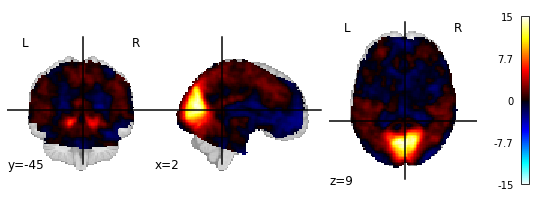

In [21]:
plotting.plot_stat_map(first_rsn)

/usr/local/lib/python3.8/dist-packages/nilearn/plotting/displays.py:101: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


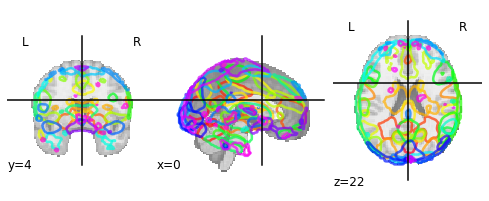

In [26]:
plotting.plot_prob_atlas(hammersmith_atlas.rsn70)

In [22]:
from nilearn import input_data

In [23]:
masker = input_data.NiftiMapsMasker(msdl_atlas.maps, t_r=2, detrend=True, low_pass=0.1, high_pass=0.01).fit()

/home/sks/anaconda3/lib/python3.7/site-packages/nilearn/image/image.py:1109: FutureWarning: The parameter "sessions" will be removed in 0.9.0 release of Nilearn. Please use the parameter "runs" instead.
  ensure_finite=ensure_finite)


In [24]:
roi_time_series = masker.transform(fmri_filenames[0])
roi_time_series.shape

(120, 39)

In [40]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([roi_time_series])[0]
correlation_matrix.shape

(39, 39)

In [26]:
msdl_atlas.labels

['L Aud',
 'R Aud',
 'Striate',
 'L DMN',
 'Med DMN',
 'Front DMN',
 'R DMN',
 'Occ post',
 'Motor',
 'R DLPFC',
 'R Front pol',
 'R Par',
 'R Post Temp',
 'Basal',
 'L Par',
 'L DLPFC',
 'L Front pol',
 'L IPS',
 'R IPS',
 'L LOC',
 'Vis',
 'R LOC',
 'D ACC',
 'V ACC',
 'R A Ins',
 'L STS',
 'R STS',
 'L TPJ',
 'Broca',
 'Sup Front S',
 'R TPJ',
 'R Pars Op',
 'Cereb',
 'Dors PCC',
 'L Ins',
 'Cing',
 'R Ins',
 'L Ant IPS',
 'R Ant IPS']

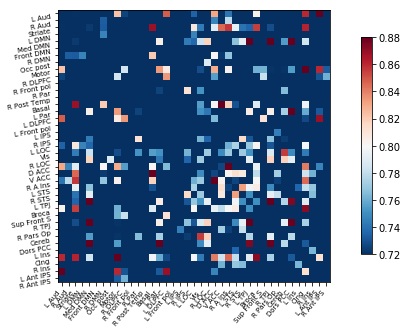

In [27]:
np.fill_diagonal(correlation_matrix,0)
plotting.plot_matrix(correlation_matrix,labels=msdl_atlas.labels, vmax=0.8, vmin=0.8, colorbar=True)

2
1
2
1
2
2
1
2
1
1


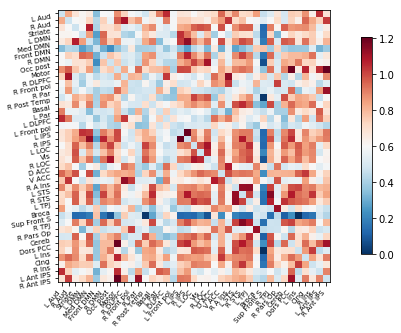

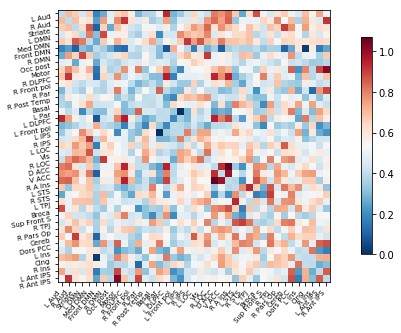

In [46]:

from nilearn.connectome import ConnectivityMeasure
final_matrix_d = np.zeros((39, 39))
lend = 0
final_matrix_nd = np.zeros((39, 39))
lennd = 0
for i in range(0, 58, 1):
    roi_time_series = masker.transform(fmri_filenames[i])
    print(ytarget[i])

    correlation_measure = ConnectivityMeasure(kind='correlation')
    correlation_matrix = correlation_measure.fit_transform([roi_time_series])[0]
    np.fill_diagonal(correlation_matrix,0)
    #plotting.plot_matrix(correlation_matrix,labels=msdl_atlas.labels, vmax=0.8, vmin=0.8, colorbar=True) 
    #plotting.plot_matrix(correlation_matrix,labels=msdl_atlas.labels,  colorbar=True) 
    #print(np.min(correlation_matrix))
    correlation_matrix = correlation_matrix - np.min(correlation_matrix)
    if(ytarget[i] == 1):
        final_matrix_nd = final_matrix_nd + correlation_matrix
        lennd = lennd  + 1
    else:
        final_matrix_d = final_matrix_d + correlation_matrix
        lend = lend + 1

    ##plotting.plot_matrix(correlation_matrix,labels=msdl_atlas.labels,  colorbar=True) 

final_matrix_d = final_matrix_d/lend
final_matrix_nd = final_matrix_nd/lennd

plotting.plot_matrix(final_matrix_d - np.min(final_matrix_d), labels=msdl_atlas.labels, colorbar=True)
plotting.plot_matrix(final_matrix_nd - np.min(final_matrix_nd), labels=msdl_atlas.labels, colorbar=True)